# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
from itertools import chain
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from data_loader import convert_tsf_to_dataframe

In [3]:
m1_monthly_dataset_list = convert_tsf_to_dataframe(os.path.dirname(os.getcwd()) + '/data/m1_monthly_dataset.tsf')
m1_monthly_dataset_raw = m1_monthly_dataset_list[0]
m1_monthly_dataset_frequency  = m1_monthly_dataset_list[1]
m1_monthly_dataset_forecast_horizon = m1_monthly_dataset_list[2]
m1_monthly_dataset_contain_missing_values = m1_monthly_dataset_list[3]
m1_monthly_dataset_contain_equal_length = m1_monthly_dataset_list[4]
m1_monthly_dataset_raw

,series_name,start_timestamp,series_value
0,T1,1975-12-01,"[697458.0, 1187650.0, 1069690.0, 1078430.0, 10..."
1,T2,1975-07-01,"[61.61, 66.74, 71.88, 82.15, 87.28, 107.82, 12..."
2,T3,1975-04-01,"[409.0, 419.0, 339.0, 421.0, 474.0, 427.0, 452..."
3,T4,1975-04-01,"[3334.0, 3363.0, 3395.0, 3831.0, 3292.0, 5043...."
4,T5,1975-03-01,"[33.66, 30.97, 38.04, 37.31, 33.86, 37.5, 36.6..."
...,...,...,...
612,T613,1967-12-01,"[3928.0, 4830.0, 4926.0, 6465.0, 8588.0, 6843...."
613,T614,1967-12-01,"[33.0, 28.0, 40.0, 31.0, 36.0, 33.0, 50.0, 57...."
614,T615,1971-12-01,"[26.0, 24.5, 27.9, 29.1, 34.7, 33.1, 36.0, 37...."
615,T616,1958-12-01,"[55.91, 56.0, 55.45, 56.01, 55.54, 56.35, 56.4..."


In [66]:
m1_monthly_dataset = (
    m1_monthly_dataset_raw
    .assign(timestamp=lambda df: df.apply(lambda row: [(row.start_timestamp + relativedelta(months=i)).date() for i in range(0, len(row.series_value))], axis=1))
    .drop('start_timestamp', axis=1)
    .assign(timestamp_series_value=lambda df: df.apply(lambda row: list(zip(row['series_value'], row['timestamp'])), axis=1))
    .explode('timestamp_series_value')
    .assign(series_value=lambda df: df.apply(lambda row: row.timestamp_series_value[0], axis=1))
    .assign(timestamp=lambda df: df.apply(lambda row: row.timestamp_series_value[1], axis=1))
    .drop('timestamp_series_value', axis=1)
)
m1_monthly_dataset

,series_name,series_value,timestamp
0,T1,697458.0,1975-12-01
0,T1,1187650.0,1976-01-01
0,T1,1069690.0,1976-02-01
0,T1,1078430.0,1976-03-01
0,T1,1059910.0,1976-04-01
...,...,...,...
616,T617,58.0,1972-07-01
616,T617,35.0,1972-08-01
616,T617,38.0,1972-09-01
616,T617,28.0,1972-10-01


<Axes: xlabel='timestamp'>

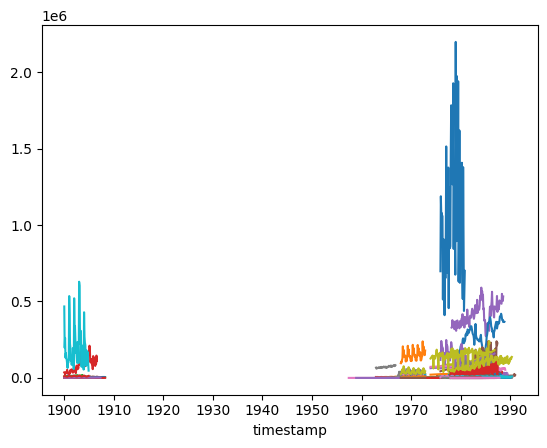

In [69]:
m1_monthly_dataset.pivot(index='timestamp', columns='series_name', values='series_value').plot(legend=False)